In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


<Figure size 800x400 with 0 Axes>

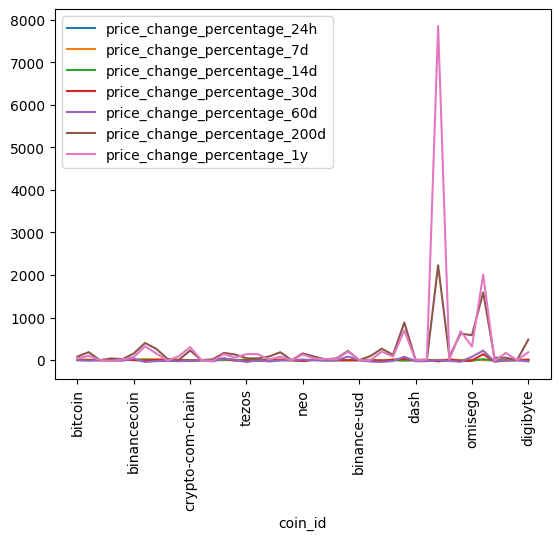

In [4]:
plt.figure(figsize=(8, 4))
df_market_data.plot.line(rot=90)
plt.show()

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h"	, "price_change_percentage_7d" ,	"price_change_percentage_14d" ,
                                                                    "price_change_percentage_30d" ,	"price_change_percentage_60d" ,
                                                                    "price_change_percentage_200d"	, "price_change_percentage_1y"]])

In [6]:
# Create a DataFrame with the scaled data

df_market_data_scaled = pd.DataFrame(market_data_scaled , columns = ["price_change_percentage_24h"	, "price_change_percentage_7d" ,	"price_change_percentage_14d" ,
                                                                    "price_change_percentage_30d" ,	"price_change_percentage_60d" ,
                                                                    "price_change_percentage_200d"	, "price_change_percentage_1y"])


# Copy the crypto names from the original data

df_market_data.reset_index(inplace=True)

df_market_data_scaled['coin_id'] = df_market_data['coin_id'].copy()

# Set the coinid column as index

df_market_data_scaled.set_index('coin_id', inplace=True)

# Display sample data

df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11

k = list(range(1, 11))

In [8]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [9]:
# Create a dictionary with the data to plot the Elbow curve

elbow_curve = {"k" : k , "Inertia" : inertia}

# Create a DataFrame with the data to plot the Elbow curve

curve_df = pd.DataFrame(elbow_curve)
curve_df.head()

,k,Inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


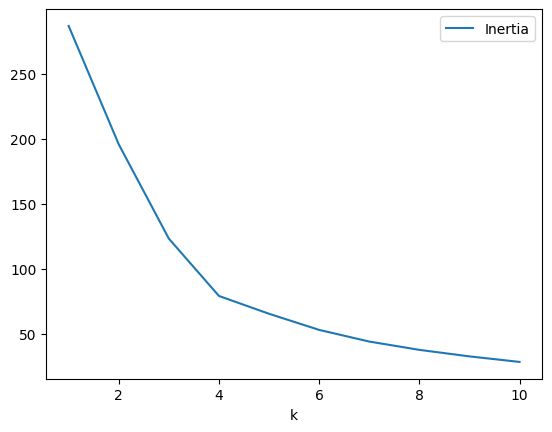

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

curve_df.plot.line("k" , "Inertia")
plt.xticks = "K"
plt.show()


#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** By looking at the elbow curve the best value for k is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4)

In [12]:
# Fit the K-Means model using the scaled data

k_model.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = k_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
k_4

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [14]:
# Create a copy of the DataFrame

df_market_data_scaled_pred = df_market_data_scaled.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters

df_market_data_scaled_pred["Clusters"] = k_4

# Display sample data
df_market_data_scaled_pred.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


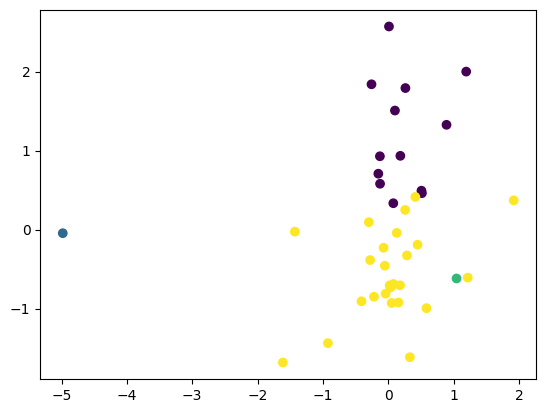

In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

plt.scatter(df_market_data_scaled_pred["price_change_percentage_24h"] , df_market_data_scaled_pred["price_change_percentage_7d"] , c=df_market_data_scaled_pred["Clusters"])
plt.show()


---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.

df_market_data_scaled_pca = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame.
df_market_data_scaled_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**The total Explained Variance is 89.49%

In [20]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(df_market_data_scaled_pca , columns=["PCA1" , "PCA2" ,"PCA3"])
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data

df_market_data_pca["coin_id"] = df_market_data['coin_id'].copy()

# Set the coinid column as index
df_market_data_pca.set_index('coin_id', inplace=True)

# Display sample data
df_market_data_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11

k_pca = list(range(1,11))

In [22]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model_pca = KMeans(n_clusters=i, random_state=0)
    k_model_pca.fit(df_market_data_pca)
    inertia.append(k_model_pca.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
# Create a dictionary with the data to plot the Elbow curve

elbow_curve_pca = {"k_pca":k_pca , "Inertia":inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_curve_pca = pd.DataFrame(elbow_curve_pca)
df_elbow_curve_pca.head()

,k_pca,Inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


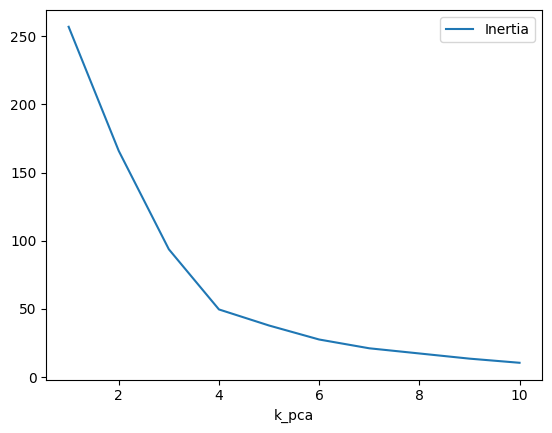

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

df_elbow_curve_pca.plot.line("k_pca" , "Inertia")
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k

model_pca = KMeans(n_clusters=4)

In [26]:
# Fit the K-Means model using the PCA data

model_pca.fit(df_market_data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data

model_pca_pred = model_pca.predict(df_market_data_pca)
# Print the resulting array of cluster values.

model_pca_pred

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [28]:
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_pred = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca_pred["Clusters"] = model_pca_pred

# Display sample data
df_market_data_pca_pred.head()

,PCA1,PCA2,PCA3,Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


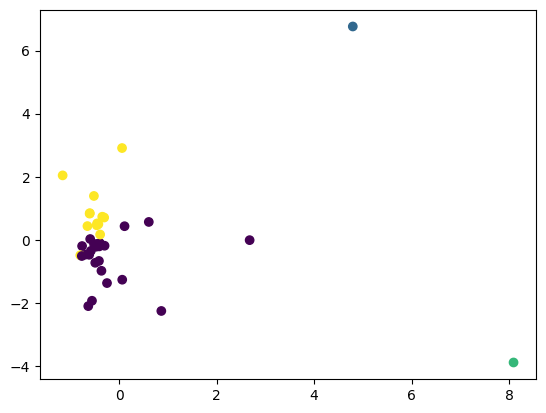

In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

plt.scatter(df_market_data_pca_pred["PCA1"] , df_market_data_pca_pred["PCA2"] , c=df_market_data_pca_pred["Clusters"])
plt.show()



### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

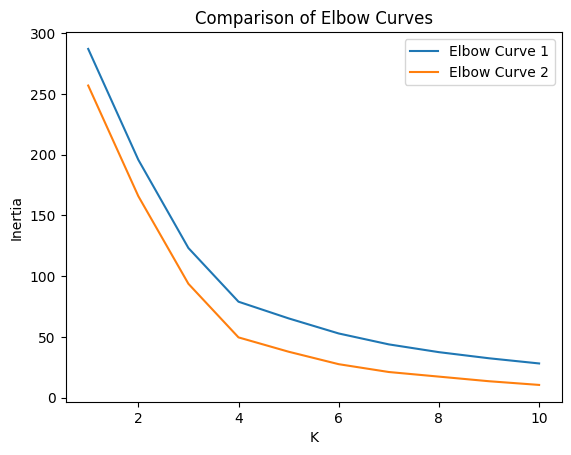

In [30]:
# Composite plot to contrast the Elbow curves

plt.plot(curve_df["k"], curve_df["Inertia"], label="Elbow Curve 1")

plt.plot(df_elbow_curve_pca["k_pca"], df_elbow_curve_pca["Inertia"], label="Elbow Curve 2")

plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Comparison of Elbow Curves")
plt.legend()
plt.show()

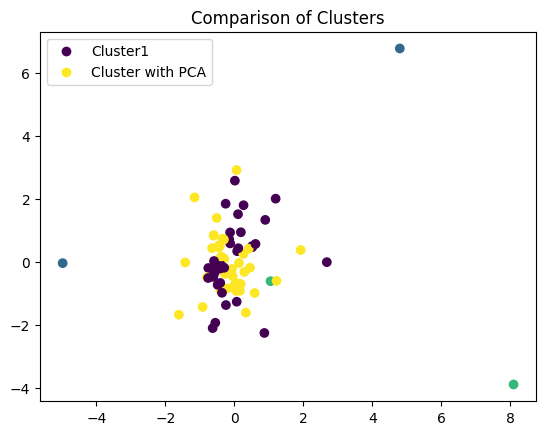

In [31]:
# Composite plot to contrast the clusters

plt.scatter(df_market_data_scaled_pred["price_change_percentage_24h"] , df_market_data_scaled_pred["price_change_percentage_7d"] , c=df_market_data_scaled_pred["Clusters"], label="Cluster1")

plt.scatter(df_market_data_pca_pred["PCA1"] , df_market_data_pca_pred["PCA2"] , c=df_market_data_pca_pred["Clusters"] , label="Cluster with PCA")

plt.title("Comparison of Clusters")
plt.legend()
plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** As it can be seen in elbow curves that the best k-value for original data and pca data is same i.e. 4.
  On contrary, the pre-processing time after pca transformation reduces significantly as the number of columns decreases.
  For clusters, the scatter plot for the data after pca transformation looks better as the clusters formed are closer and can be identified easily.